In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [275]:
df = pd.read_csv('data_youtube.csv', header = 0)

In [276]:
df

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official
0,UCcADqTjMyMol8B8mWm9n6rA,SECHSKIES,545000,ASTklj0bfF8,SECHSKIES - 'ALL FOR YOU' M/V TEASER,2020-01-23 07:00:00+00:00,#SECHSKIES #젝스키스 #THE1STMINIALBUM #ALLFORYOU #...,https://i.ytimg.com/vi/ASTklj0bfF8/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', '젝스...",10,83794.0,10209.0,495.0,PT36S,X-jbgKPEf40,SECHSKIES - 'ALL FOR YOU' M/V,2020-01-28 09:00:10+00:00,PT4M11S,9066650.0
1,UCcADqTjMyMol8B8mWm9n6rA,SECHSKIES,545000,9aDxjTXRyGw,EUN JIWON(은지원) - ‘불나방 (I’M ON FIRE) (Feat. Blu...,2019-06-25 01:00:01+00:00,#EUNJIWON #은지원 #G1 #불나방 #ImOnFire #YG,https://i.ytimg.com/vi/9aDxjTXRyGw/default.jpg,"['젝스키스', '젝키', 'SECHSKIES', '은지원', 'EUN JIWON'...",10,159622.0,14686.0,893.0,PT32S,iR7HsIrFqoU,EUN JIWON(은지원) - '불나방 (I’M ON FIRE) (Feat. Blu...,2019-06-27 09:00:06+00:00,PT3M40S,13191584.0
2,UCcADqTjMyMol8B8mWm9n6rA,SECHSKIES,545000,EuWyOcvZ0Ac,SECHSKIES - ‘웃어줘(SMILE)’ M/V TEASER,2017-09-20 07:00:00+00:00,#SECHSKIES #젝스키스 #젝키 #ANOTHERLIGHT #웃어줘 #SMILE...,https://i.ytimg.com/vi/EuWyOcvZ0Ac/default.jpg,"['젝스키스', '젝키', 'SECHSKIES', '은지원', '장수원', '강성훈...",10,45852.0,4241.0,269.0,PT31S,eijTpIN6tsA,SECHSKIES - ‘웃어줘(SMILE)’ M/V,2017-09-21 09:00:03+00:00,PT3M52S,1019823.0
3,UCcADqTjMyMol8B8mWm9n6rA,SECHSKIES,545000,XL3EWBlu0k4,SECHSKIES - ‘특별해(SOMETHING SPECIAL)’ M/V TEASER,2017-09-20 01:00:00+00:00,#SECHSKIES #젝스키스 #젝키 #ANOTHERLIGHT #특별해 #SOMET...,https://i.ytimg.com/vi/XL3EWBlu0k4/default.jpg,"['젝스키스', '젝키', 'SECHSKIES', '은지원', '장수원', '강성훈...",10,74224.0,5770.0,475.0,PT15S,MEaZkhrHOsE,SECHSKIES - ‘특별해(SOMETHING SPECIAL)’ M/V,2017-09-21 15:00:02+00:00,PT3M21S,6960461.0
4,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),6500000,60HQ7Ehrw3s,TREASURE - 'HELLO' M/V TEASER,2022-10-01 00:00:02+00:00,#TREASURE #트레저 #2ndMINIALBUM #THESECONDSTEP_CH...,https://i.ytimg.com/vi/60HQ7Ehrw3s/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', '트레...",24,1643404.0,273036.0,20451.0,PT30S,aPd9exmH17o,TREASURE - ‘HELLO’ M/V,2022-10-04 09:17:22+00:00,PT3M6S,48602859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,UCg8ZzloDPTrOiGztK0C9txQ,THEBLACKLABEL,2670000,F8__T6Gi29Y,Zion.T - '5월의 밤(May)' M/V Teaser 1,2019-11-01 15:00:02+00:00,#ZIONT #자이언티 #5월의밤 #MAY #THEBLACKLABEL #더블랙레이블,https://i.ytimg.com/vi/F8__T6Gi29Y/default.jpg,"['ZIONT', '자이언티', '5월의밤', 'MAY', 'THEBLACKLABE...",10,44215.0,NaN,154.0,PT40S,I-hw1AkqFro,Zion.T - ‘5월의 밤(May)' M/V,2019-11-06 09:00:03+00:00,PT6M45S,1120387.0
839,UCg8ZzloDPTrOiGztK0C9txQ,THEBLACKLABEL,2670000,3SEOqt3o5Mk,Vince - ‘맨날 (MENNAL) (Feat. Okasian)’ M/V TEAS...,2019-09-30 03:00:02+00:00,#VINCE #맨날 #MENNAL #OKASIAN #ZIONT #BRYANCHASE...,https://i.ytimg.com/vi/3SEOqt3o5Mk/default.jpg,"['Vince', '빈스', '맨날', 'MENNAL', '오케이션', 'OKASI...",10,53767.0,4580.0,238.0,PT20S,vvlNOzConrg,Vince - ‘맨날 (MENNAL) (Feat. Okasian)’ M/V,2019-10-02 09:00:09+00:00,PT3M4S,1193079.0
840,UCg8ZzloDPTrOiGztK0C9txQ,THEBLACKLABEL,2670000,Ykg6o7cNPE8,Vince - ‘맨날 (MENNAL) (Feat. Okasian)’ M/V TEAS...,2019-09-27 03:00:06+00:00,#VINCE #OKASIAN #맨날 #MENNAL #THEBLACKLABEL,https://i.ytimg.com/vi/Ykg6o7cNPE8/default.jpg,"['Vince', '빈스', '맨날', 'MENNAL', '오케이션', 'Okasi...",10,61598.0,5453.0,304.0,PT18S,vvlNOzConrg,Vince - ‘맨날 (MENNAL) (Feat. Okasian)’ M/V,2019-10-02 09:00:09+00:00,PT3M4S,1193079.0
841,UCg8ZzloDPTrOiGztK0C9txQ,THEBLACKLABEL,2670000,FTfAugiLZto,JEON SOMI (전소미) - 'BIRTHDAY' M/V Teaser,2019-06-12 02:00:00+00:00,[JEON SOMI (전소미) - ‘BIRTHDAY’ M/V TEASER]\n\n#...,https://i.ytimg.com/vi/FTfAugiLZto/default.jpg,"['SOMI', '전소미', 'KPOP', 'K-POP', 'THEBLACKLABE...",10,3714137.0,241089.0,7226.0,PT16S,oDJ4ct59NC4,JEON SOMI (전소미) - 'BIRTHDAY' M/V,2019-06-13 09:29:45+00:00,PT3M11

In [277]:
df.describe()

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_viewCount_mv_official
count,8.430000e+02,843.000000,8.430000e+02,8.400000e+02,8.430000e+02,8.430000e+02
mean,3.697966e+07,10.185053,2.228863e+06,2.339112e+05,1.560779e+04,6.068780e+07
std,1.871788e+07,1.545483,5.981895e+06,5.597194e+05,6.258785e+04,1.630413e+08
min,5.450000e+05,10.000000,2.643000e+04,2.440000e+02,2.300000e+01,5.404100e+04
25%,3.100000e+07,10.000000,2.738275e+05,2.609150e+04,1.252500e+03,2.912679e+06
50%,3.100000e+07,10.000000,7.781970e+05,7.717250e+04,3.671000e+03,1.282217e+07
75%,3.100000e+07,10.000000,1.911116e+06,2.348922e+05,9.755000e+03,4.866104e+07
max,8.270000e+07,24.000000,7.455472e+07,6.455305e+06,1.120846e+06,1.972629e+09


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_channelId                843 non-null    object 
 1   video_channelTitle             843 non-null    object 
 2   video_channelSubscriber        843 non-null    int64  
 3   video_id                       843 non-null    object 
 4   video_title                    843 non-null    object 
 5   video_publishedAt              843 non-null    object 
 6   video_description              842 non-null    object 
 7   video_thumbnails               843 non-null    object 
 8   video_tags                     782 non-null    object 
 9   video_categoryId               843 non-null    int64  
 10  video_viewCount                843 non-null    float64
 11  video_likeCount                840 non-null    float64
 12  video_commentCount             843 non-null    flo

In [279]:
cats = list(df.select_dtypes('O').columns)
nums = list(df.select_dtypes(['float', 'int']).columns)
nums

['video_channelSubscriber',
 'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_viewCount_mv_official']

In [280]:
df[nums].describe()

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_viewCount_mv_official
count,8.430000e+02,843.000000,8.430000e+02,8.400000e+02,8.430000e+02,8.430000e+02
mean,3.697966e+07,10.185053,2.228863e+06,2.339112e+05,1.560779e+04,6.068780e+07
std,1.871788e+07,1.545483,5.981895e+06,5.597194e+05,6.258785e+04,1.630413e+08
min,5.450000e+05,10.000000,2.643000e+04,2.440000e+02,2.300000e+01,5.404100e+04
25%,3.100000e+07,10.000000,2.738275e+05,2.609150e+04,1.252500e+03,2.912679e+06
50%,3.100000e+07,10.000000,7.781970e+05,7.717250e+04,3.671000e+03,1.282217e+07
75%,3.100000e+07,10.000000,1.911116e+06,2.348922e+05,9.755000e+03,4.866104e+07
max,8.270000e+07,24.000000,7.455472e+07,6.455305e+06,1.120846e+06,1.972629e+09


In [281]:
df[cats].describe()

,video_channelId,video_channelTitle,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official
count,843,843,843,843,843,842,843,782,843,843,843,843,843
unique,10,10,843,841,840,829,843,595,59,613,613,610,149
top,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,ASTklj0bfF8,ZICO (지코) 'SEOUL DRIFT' MV Teaser,2017-07-17 15:00:02+00:00,ZICO (지코) '괴짜 (Freak)' MV Teaser\n\n[Grown Ass...,https://i.ytimg.com/vi/ASTklj0bfF8/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",PT24S,kM-hUmIb520,ENHYPEN (엔하이픈) 'Blessed-Cursed' Official MV (C...,2022-08-30 15:00:01+00:00,PT3M50S
freq,498,498,1,2,2,2,1,57,50,8,8,10,21


<AxesSubplot:>

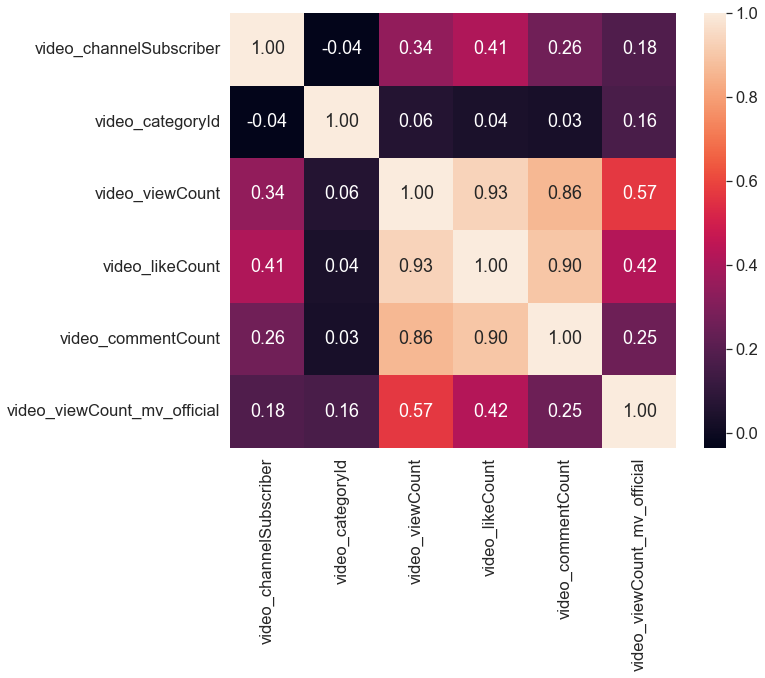

In [282]:
corr_= df[nums].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f")

In [283]:
df_pre = df.copy()

In [284]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_channelId                843 non-null    object 
 1   video_channelTitle             843 non-null    object 
 2   video_channelSubscriber        843 non-null    int64  
 3   video_id                       843 non-null    object 
 4   video_title                    843 non-null    object 
 5   video_publishedAt              843 non-null    object 
 6   video_description              842 non-null    object 
 7   video_thumbnails               843 non-null    object 
 8   video_tags                     782 non-null    object 
 9   video_categoryId               843 non-null    int64  
 10  video_viewCount                843 non-null    float64
 11  video_likeCount                840 non-null    float64
 12  video_commentCount             843 non-null    flo

In [285]:
def convert_tags_to_list(string_tag):
    list_tag= re.sub('\\[|\\]','',string_tag).split(',')
    return list_tag
    

In [286]:
no_tags = []
list_tags_teaser = list(df_pre['video_tags'])
# isinstance('abc', str)
for list_tag in list_tags_teaser:
    # print(type(list_tag))
    if isinstance(list_tag,str):
        no_tags.append(len(convert_tags_to_list(list_tag)))
    else:
        no_tags.append(np.nan)
   


In [287]:
title_len = []

titles_teaser = list(df_pre['video_title'])
for title_teaser  in  titles_teaser:
    title_len.append(len(title_teaser))


In [288]:
description_len = []
descriptions_teaser = list(df_pre['video_description'])

for description_teaser in descriptions_teaser:
    if isinstance(description_teaser,str):
        description_len.append(len(description_teaser))
    else:
        description_len.append(np.nan)
len(description_len)


843

In [289]:
df_pre['video_num_tag'] = no_tags
df_pre['video_title_len'] = title_len
df_pre['video_description_len'] = description_len

In [290]:
df_pre.isnull().sum()

video_channelId                   0
video_channelTitle                0
video_channelSubscriber           0
video_id                          0
video_title                       0
video_publishedAt                 0
video_description                 1
video_thumbnails                  0
video_tags                       61
video_categoryId                  0
video_viewCount                   0
video_likeCount                   3
video_commentCount                0
video_duration_teaser             0
video_id_mv_official              0
video_title_mv_official           0
video_publishedAt_mv_official     0
video_duration_mv_official        0
video_viewCount_mv_official       0
video_num_tag                    61
video_title_len                   0
video_description_len             1
dtype: int64

In [291]:
num_pre = list(df_pre.select_dtypes(['float','int']).columns)
num_pre = ['video_channelSubscriber',
 'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_num_tag',
 'video_title_len',
 'video_description_len',
 'video_viewCount_mv_official',]

<AxesSubplot:>

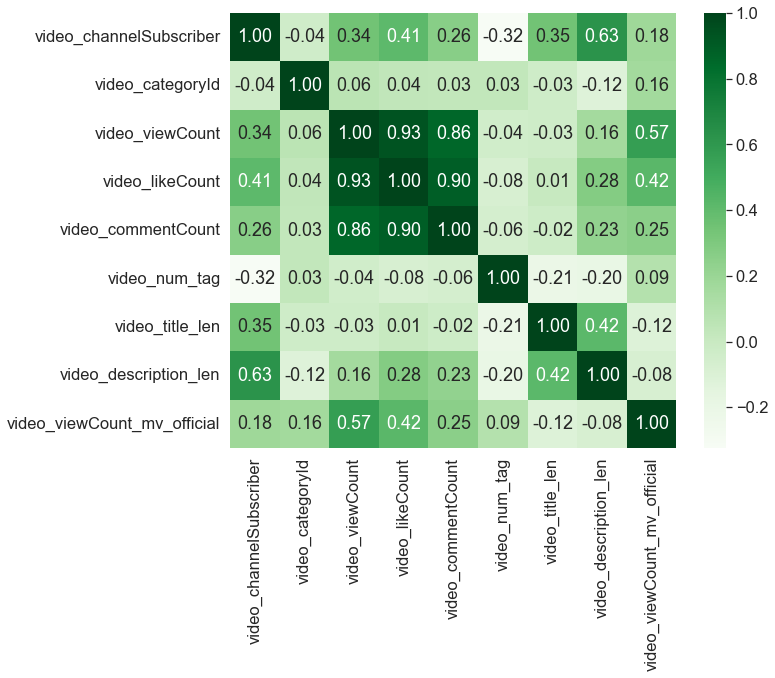

In [292]:
corr_= df_pre[num_pre].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="Greens")

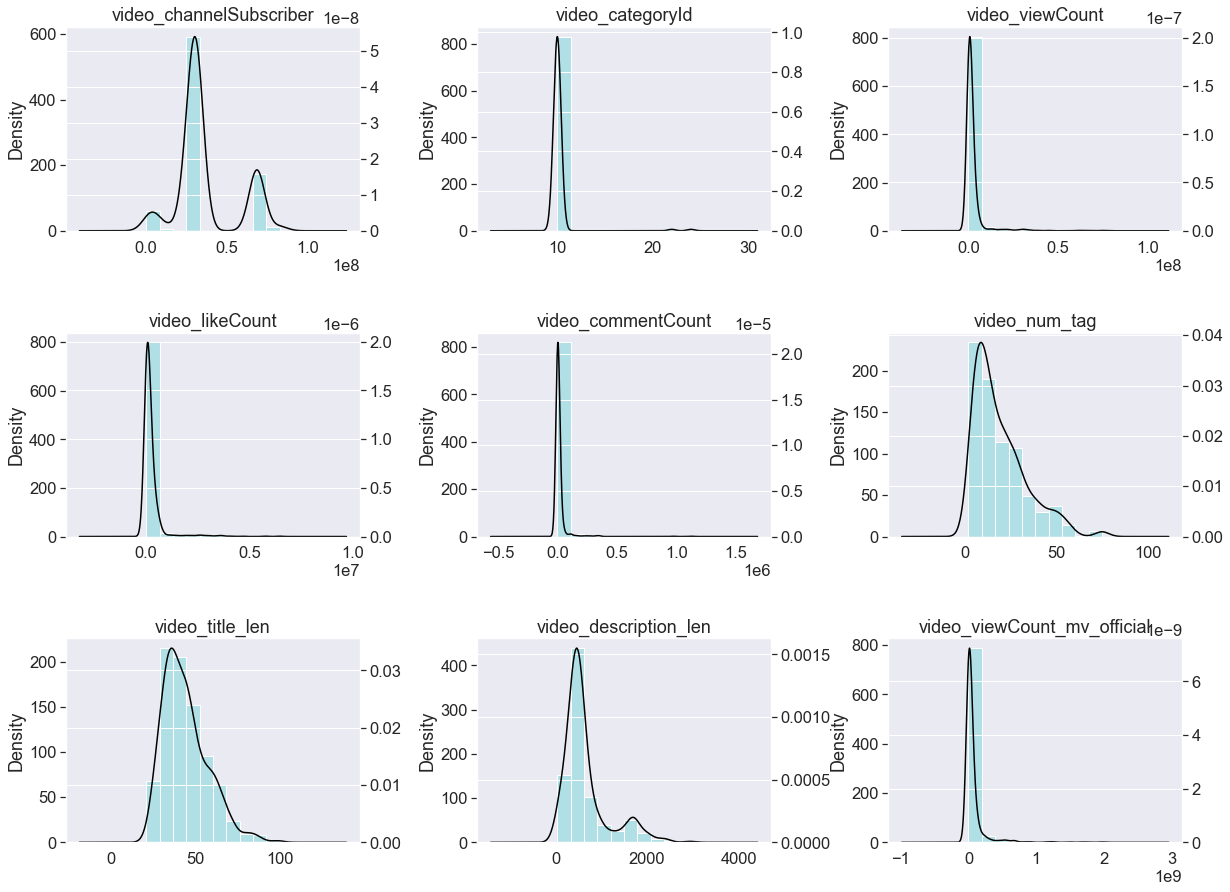

In [293]:
data_num = df_pre[num_pre]
plt.figure(figsize= (20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
for i, (name, col) in enumerate(data_num.iteritems()):
    plt.subplot(3, 3, i+1)
    col.hist( color='powderblue')
    ax2 = col.plot.kde( secondary_y=True, title=name, color='black')
    ax2.set_ylim(0)



Xử lý missing vallue

In [294]:
df_num = df_pre[num_pre].copy()

In [295]:
df_num.isna().sum()

video_channelSubscriber         0
video_categoryId                0
video_viewCount                 0
video_likeCount                 3
video_commentCount              0
video_num_tag                  61
video_title_len                 0
video_description_len           1
video_viewCount_mv_official     0
dtype: int64

In [296]:
df_num['video_num_tag'].fillna(df_num['video_num_tag'].mean(),  inplace=True)
df_num['video_description_len'].fillna(df_num['video_description_len'].mean(),  inplace=True)
df_num['video_likeCount'].fillna(df_num['video_likeCount'].mean(),  inplace=True)

In [297]:
df_num.isna().sum()

video_channelSubscriber        0
video_categoryId               0
video_viewCount                0
video_likeCount                0
video_commentCount             0
video_num_tag                  0
video_title_len                0
video_description_len          0
video_viewCount_mv_official    0
dtype: int64

In [298]:
df_num.describe()

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,video_viewCount_mv_official
count,8.430000e+02,843.000000,8.430000e+02,8.430000e+02,8.430000e+02,843.000000,843.000000,843.000000,8.430000e+02
mean,3.697966e+07,10.185053,2.228863e+06,2.339112e+05,1.560779e+04,19.324808,44.233689,637.353919,6.068780e+07
std,1.871788e+07,1.545483,5.981895e+06,5.587214e+05,6.258785e+04,13.776184,13.220538,489.444746,1.630413e+08
min,5.450000e+05,10.000000,2.643000e+04,2.440000e+02,2.300000e+01,2.000000,21.000000,33.000000,5.404100e+04
25%,3.100000e+07,10.000000,2.738275e+05,2.618050e+04,1.252500e+03,9.000000,34.000000,356.000000,2.912679e+06
50%,3.100000e+07,10.000000,7.781970e+05,7.760200e+04,3.671000e+03,16.000000,42.000000,492.000000,1.282217e+07
75%,3.100000e+07,10.000000,1.911116e+06,2.342406e+05,9.755000e+03,25.000000,52.000000,687.000000,4.866104e+07
max,8.270000e+07,24.000000,7.455472e+07,6.455305e+06,1.120846e+06,75.000000,100.000000,2955.000000,1.972629e+09


predict

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [300]:
df_train, df_test = train_test_split(df_num, test_size=0.2, random_state= 43, shuffle= True)
X_train = df_train.copy()
y_train = X_train.pop("video_viewCount_mv_official")

X_test = df_test.copy()
y_test = X_test.pop("video_viewCount_mv_official")

In [301]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [302]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [303]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [304]:
# # LINEAR REGRESSION

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


eval_regression(model, y_pred_test, X_train, y_train, X_test, y_test)

MAE: 48586517.69
MSE: 97449027.28
R2 score: 0.54


In [305]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 3)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)
eval_regression(reg_ridge, y_pred, X_train, y_train, X_test, y_test)

MAE: 57317984.03
MSE: 111881113.91
R2 score: 0.39


In [306]:
from sklearn.linear_model import Lasso


reg_lasso = Lasso(alpha = 3.8)
reg_lasso.fit(X_train, y_train)

y_pred = reg_lasso.predict(X_test)
eval_regression(reg_lasso, y_pred, X_train, y_train, X_test, y_test)


MAE: 48586499.95
MSE: 97448930.02
R2 score: 0.54


In [307]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
eval_regression(clf, y_pred, X_train, y_train, X_test, y_test)

MAE: 48532750.29
MSE: 96903164.62
R2 score: 0.54


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You 

In [308]:
from sklearn.linear_model import ElasticNet


regr = ElasticNet(alpha = 1.0, l1_ratio=0.5, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
eval_regression(regr, y_pred, X_train, y_train, X_test, y_test)

MAE: 72472181.68
MSE: 140938132.55
R2 score: 0.03


In [309]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
nEstimator = np.arange(1,20,1)
depth =  np.arange(1,20,1)

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2')
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

Fitting 5 folds for each of 361 candidates, totalling 1805 fits
Best HyperParameter:  {'max_depth': 9, 'n_estimators': 12}
0.5084746401988491


C:\Users\Admin\AppData\Local\Temp\ipykernel_6196\3369749777.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


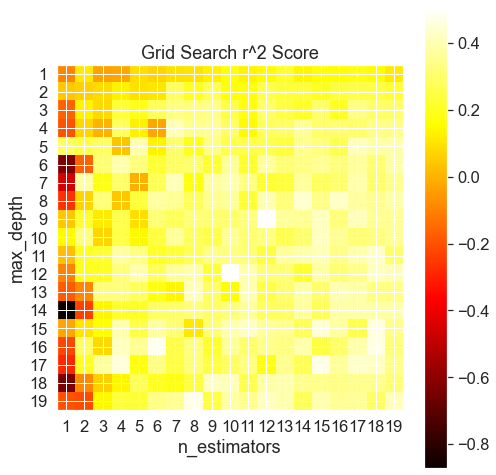

In [310]:
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()

In [328]:
print(X_train[100])
y_train[100]

[3.08623943e-01 0.00000000e+00 7.30440980e-04 1.73321368e-03
 2.98457522e-04 1.00000000e+00 1.89873418e-01 1.58795346e-01]


3721290.0

In [311]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state= 104)
best_model1 = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_regression(rf, y_pred, X_train, y_train, X_test, y_test)



MAE: 34506663.95
MSE: 70544853.48
R2 score: 0.76


In [330]:
print(rf.score(X_train, y_train))

0.9212879339128855


In [317]:
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
SK

,True Labels,Predicted Labels
438,47669332.0,46129167.68
111,30164884.0,21079254.56
518,414880.0,160168.68
611,56393279.0,21832515.90
128,18608165.0,34800209.51
...,...,...
559,22893988.0,21220053.12
270,350313.0,382157.29
545,5117998.0,3833716.07
584,11702642.0,22115386.55


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


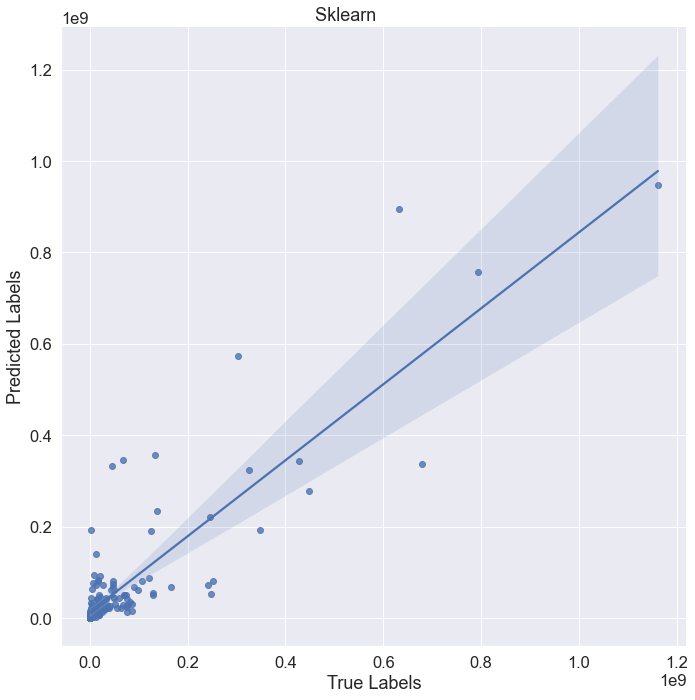

In [314]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)